<a href="https://colab.research.google.com/github/rajapriyanshu2002/cat-dog-identifier/blob/main/DOG%3FCAT%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajapriyanshu","key":"9453e7904962492580ddde33ad346faa"}'}

In [ ]:
#downloading direct through kaggle dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [ ]:
#extracting zipfile
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generators (use to process vry large amount of data)
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Normalize
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)


In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer= 'adam',loss= 'binary_crossentropy',metrics= ['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs= 10,validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.3189 - accuracy: 0.5996 - val_loss: 0.5636 - val_accuracy: 0.7106
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5470 - accuracy: 0.7240 - val_loss: 0.5621 - val_accuracy: 0.7152
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4632 - accuracy: 0.7818 - val_loss: 0.5156 - val_accuracy: 0.7638
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4064 - accuracy: 0.8160 - val_loss: 0.6920 - val_accuracy: 0.6926
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3487 - accuracy: 0.8453 - val_loss: 0.4657 - val_accuracy: 0.7788
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2812 - accuracy: 0.8809 - val_loss: 1.5143 - val_accuracy: 0.7182
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2141 - accuracy: 0.9105 - val_loss: 1.6034 - val_ac

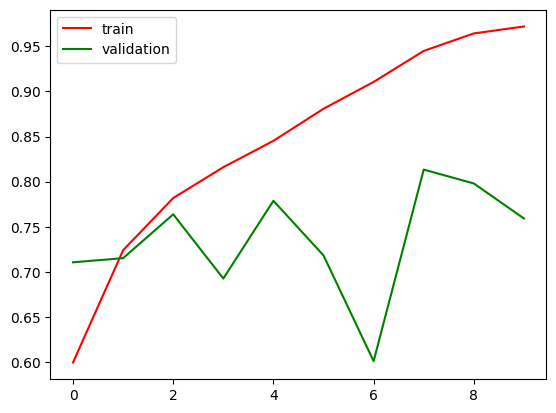

In [ ]:

plt.plot(history.history['accuracy'],color='red', label= 'train')
plt.plot(history.history['val_accuracy'],color='green', label= 'validation')
plt.legend()
plt.show()



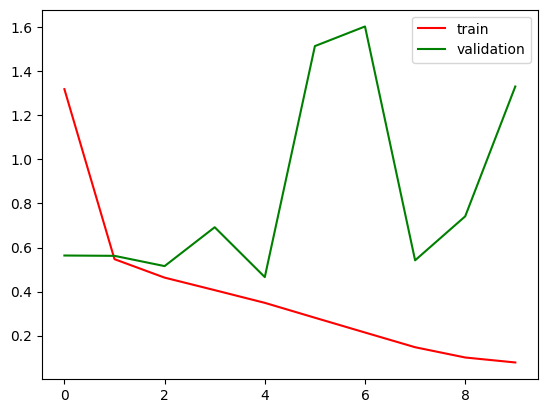

In [ ]:
plt.plot(history.history['loss'],color='red', label= 'train')
plt.plot(history.history['val_loss'],color='green', label= 'validation')
plt.legend()
plt.show()


In [ ]:
#way to reduce overfitting
#add more data
#data augmentation
#L!/L2 Regularizer
#Batch normalization    (used here)
#dropout                (used here)

In [ ]:
test_img= cv2.imread('/cat.jpeg')

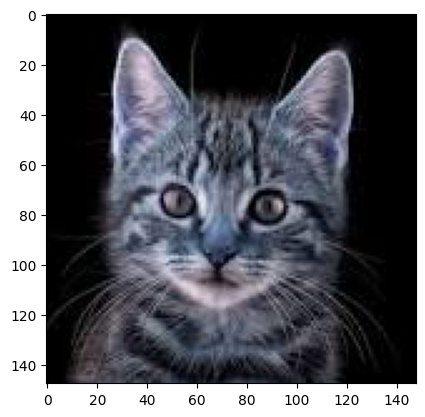

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
#(img_quantity,dimension,dimension,layer)
test_input = test_img.reshape(1,256,256,3)

In [ ]:
for i in model.predict(test_input):
  if i==1:
    print('DOG')
  else:
    print('CAT')

1/1 [==============================] - 0s 26ms/step
CAT
